In [1]:
import numpy as np

### Problem 1: Broadcasting to Normalize a 3D Dataset

Imagine you have a 3D dataset representing a series of 2D sensor readings over time, with a shape of `(num_timesteps, height, width)`. Your task is to perform "per-timestep normalization" by subtracting the mean value of each 2D slice (at each timestep) from that slice. You must do this without using any explicit loops.

**Your Task:**

1.  Create a random 3D NumPy array called `dataset` of shape `(10, 5, 5)` with integer values between 0 and 100.
2.  Calculate the mean of each 2D slice along `axis=(1, 2)`. This will result in a 1D array of shape `(10,)` containing 10 mean values.
3.  Use broadcasting with `np.newaxis` to subtract the corresponding mean from each 2D slice in the original `dataset`.
4.  Print the shape of your calculated means array and the shape of the final normalized dataset to verify the operation.

In [11]:
dataset=np.random.randint(1,100,size=(10,5,5))
dataset.shape

mean = np.mean(dataset, axis=(1,2))
print(len(mean))

print(mean)

np.broadcast_to(mean[:, np.newaxis, np.newaxis], dataset.shape)

10
[54.24 45.72 50.68 48.32 46.36 42.68 51.28 50.68 54.12 45.44]


array([[[54.24, 54.24, 54.24, 54.24, 54.24],
        [54.24, 54.24, 54.24, 54.24, 54.24],
        [54.24, 54.24, 54.24, 54.24, 54.24],
        [54.24, 54.24, 54.24, 54.24, 54.24],
        [54.24, 54.24, 54.24, 54.24, 54.24]],

       [[45.72, 45.72, 45.72, 45.72, 45.72],
        [45.72, 45.72, 45.72, 45.72, 45.72],
        [45.72, 45.72, 45.72, 45.72, 45.72],
        [45.72, 45.72, 45.72, 45.72, 45.72],
        [45.72, 45.72, 45.72, 45.72, 45.72]],

       [[50.68, 50.68, 50.68, 50.68, 50.68],
        [50.68, 50.68, 50.68, 50.68, 50.68],
        [50.68, 50.68, 50.68, 50.68, 50.68],
        [50.68, 50.68, 50.68, 50.68, 50.68],
        [50.68, 50.68, 50.68, 50.68, 50.68]],

       [[48.32, 48.32, 48.32, 48.32, 48.32],
        [48.32, 48.32, 48.32, 48.32, 48.32],
        [48.32, 48.32, 48.32, 48.32, 48.32],
        [48.32, 48.32, 48.32, 48.32, 48.32],
        [48.32, 48.32, 48.32, 48.32, 48.32]],

       [[46.36, 46.36, 46.36, 46.36, 46.36],
        [46.36, 46.36, 46.36, 46.36, 46.36],
  

### Problem 2: Data Cleaning a 4D Array with Masked Indexing

You have a 4D array representing a batch of images, with shape `(batch_size, height, width, channels)`. The data contains some noise and invalid values. Your goal is to clean it by clipping outliers and removing negative sensor errors.

**Your Task:**

1.  Create a random 4D NumPy array named `image_batch` of shape `(2, 10, 10, 3)`. Populate it with integers from -20 to 120.
2.  Create a boolean mask to identify all values that are "outliers" (less than 0 or greater than 100).
3.  Use the mask to **clip** the data: set all values greater than 100 to `100`, and all values less than 0 to `0`. (Hint: You can do this with two separate masks or one combined operation).
4.  Finally, create another mask to find all values that are exactly `0` and replace them with `-1` to indicate they were corrected values.
5.  Print the array after clipping and after the final replacement.

In [16]:
image_batch= np.random.randint(-20,120,size=(2,10,10,3))

mask = (image_batch >=0) & (image_batch <=100)

#use the mask to set values > 100 to 100 and values <0 to 0
image_batch[~mask] = np.clip(image_batch[~mask], 0, 100)


### Problem 3: Creating a Geometric Mask with Broadcasting

Your task is to create a 2D "target" mask, where a circular ring (annulus) is marked as `1` and everything else is `0`. This is useful for selecting regions of interest in images.

**Your Task:**

1.  Create a 1D array for x and y coordinates from -5 to 5 with 50 points using `np.linspace`.
2.  Use `np.meshgrid` to create 2D coordinate grids `X` and `Y`.
3.  Calculate a 2D array `R` representing the distance of each point `(X, Y)` from the origin `(0, 0)`. The formula is $R = \sqrt{X^2 + Y^2}$. This calculation will rely on broadcasting.
4.  Create a new array `target_mask` of the same shape as `R`, initialized with zeros.
5.  Use **masked indexing** with logical operators to set the elements of `target_mask` to `1` where `R` is between an inner radius of 2.0 and an outer radius of 4.0 (i.e., `2.0 < R < 4.0`).
6.  Use `matplotlib.pyplot.imshow()` to visualize your final `target_mask`.

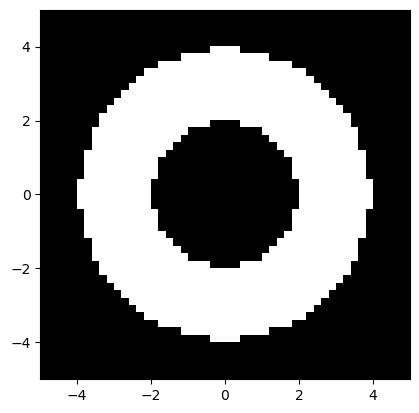

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

# 2) 2D grids
X, Y = np.meshgrid(x, y, indexing="xy")

R= np.sqrt(X**2 + Y**2)

mask = (R > 2.0) & (R < 4.0)

target_mask= np.zeros(R.shape)

target_mask[mask] = 1.0

plt.imshow(target_mask, extent=(-5, 5, -5, 5),cmap='gray')





### Problem 4: Combined Processing Pipeline

You are processing sensor data stored in a 3D array of shape `(timesteps, sensors, measurements)`. You need to apply calibration, flag invalid data, and then extract readings from a specific set of critical sensors.

**Your Task:**

1.  Create a 3D array `raw_data` of shape `(50, 8, 3)` with random float values from -1.0 to 10.0. This represents 50 timesteps for 8 sensors, with 3 measurements each.
2.  **Broadcasting:** Create a 1D `calibration_factors` array of shape `(8,)` with random values. Multiply `raw_data` by these factors. Each sensor's data across all timesteps and measurements should be multiplied by its corresponding factor. You will need to use `np.newaxis` to align the arrays for broadcasting. Store the result in `calibrated_data`.
3.  **Masked Indexing:** In `calibrated_data`, any negative values are considered errors. Use a boolean mask to replace all negative values with `0`.
4.  **Special Indexing:** You are given a list of critical sensors, `critical_sensors = np.array([1, 3, 7])`. Use this array to extract all data (all timesteps and all measurements) for only these sensors. Store this in `final_data`.
5.  Print the shapes of `raw_data`, `calibrated_data`, and `final_data` to confirm each step was successful.

In [ ]:
raw_data=np.random.uniform((-1.0,10.0), size=(50,8,3))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50, 8, 3) and arg 1 with shape (2,).

: 

### Problem 5: Creating and Customizing a Contour Plot

You need to visualize a **2D mathematical function** that represents a wave pattern originating from a single point.

---

### **Your Task**

1. **Create coordinate arrays:**  
    - Generate 1D arrays for `x` and `y` coordinates from **-10 to 10** with **200 points** using `np.linspace`.

2. **Create a meshgrid:**  
    - Use `np.meshgrid` to create 2D coordinate grids `X` and `Y`.

3. **Calculate distance from origin:**  
    - Compute a 2D array `R` representing the distance of each point `(X, Y)` from the origin `(0, 0)`.  
      - Formula: `R = sqrt(X^2 + Y^2)`

4. **Compute the wave function:**  
    - Calculate `Z = np.sin(R) / R` over the grid.
    - Handle the division-by-zero warning at the origin by replacing `nan` values in `Z` with `1` (the limit of `sin(x)/x` as `x → 0`).

5. **Visualize with contour plots:**  
    - Use `matplotlib.pyplot.contourf()` to create a **filled contour plot** of `Z` with **20 levels**.
    - Overlay with `plt.contour()` to draw **black contour lines**.

6. **Enhance the plot:**  
    - Add a **title** and a **color bar** to the plot for clarity.


(array([49851., 50149.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

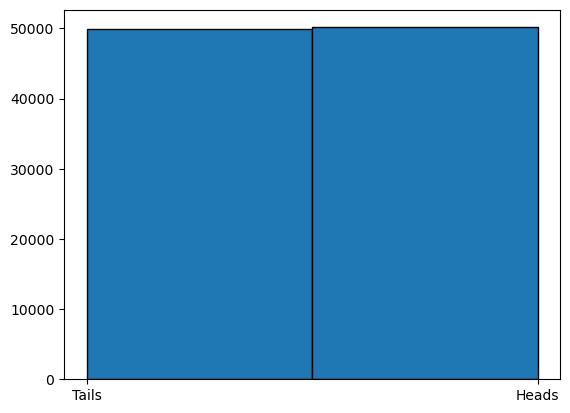

In [ ]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
coins=np.random.choice(["Heads","Tails"], p=[0.5,0.5], size=100000)

plt.hist(coins, bins=2, label=['Heads','Tails'],edgecolor='black')
